<a href="https://colab.research.google.com/github/Namneet2001/OOPs_Lab/blob/master/CA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download dansbecker/food-101

food-101.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
import os

# Define the directory where you want to extract the dataset
dataset_dir = "/content/food-101"

# Make sure the directory exists
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

# Define the path to the downloaded zip file
zip_file_path = "/content/food-101.zip"

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_dir)

In [ ]:
print(os.listdir(dataset_dir))

['food-101.zip', 'food-101']


In [ ]:
dataset_subdir = os.path.join(dataset_dir, "food-101")
print(os.listdir(dataset_subdir))

['__MACOSX', 'food-101']


In [ ]:
inner_dir = os.path.join(dataset_subdir, "food-101")
print(os.listdir(inner_dir))


['license_agreement.txt', 'meta', 'images', 'README.txt', '.DS_Store']


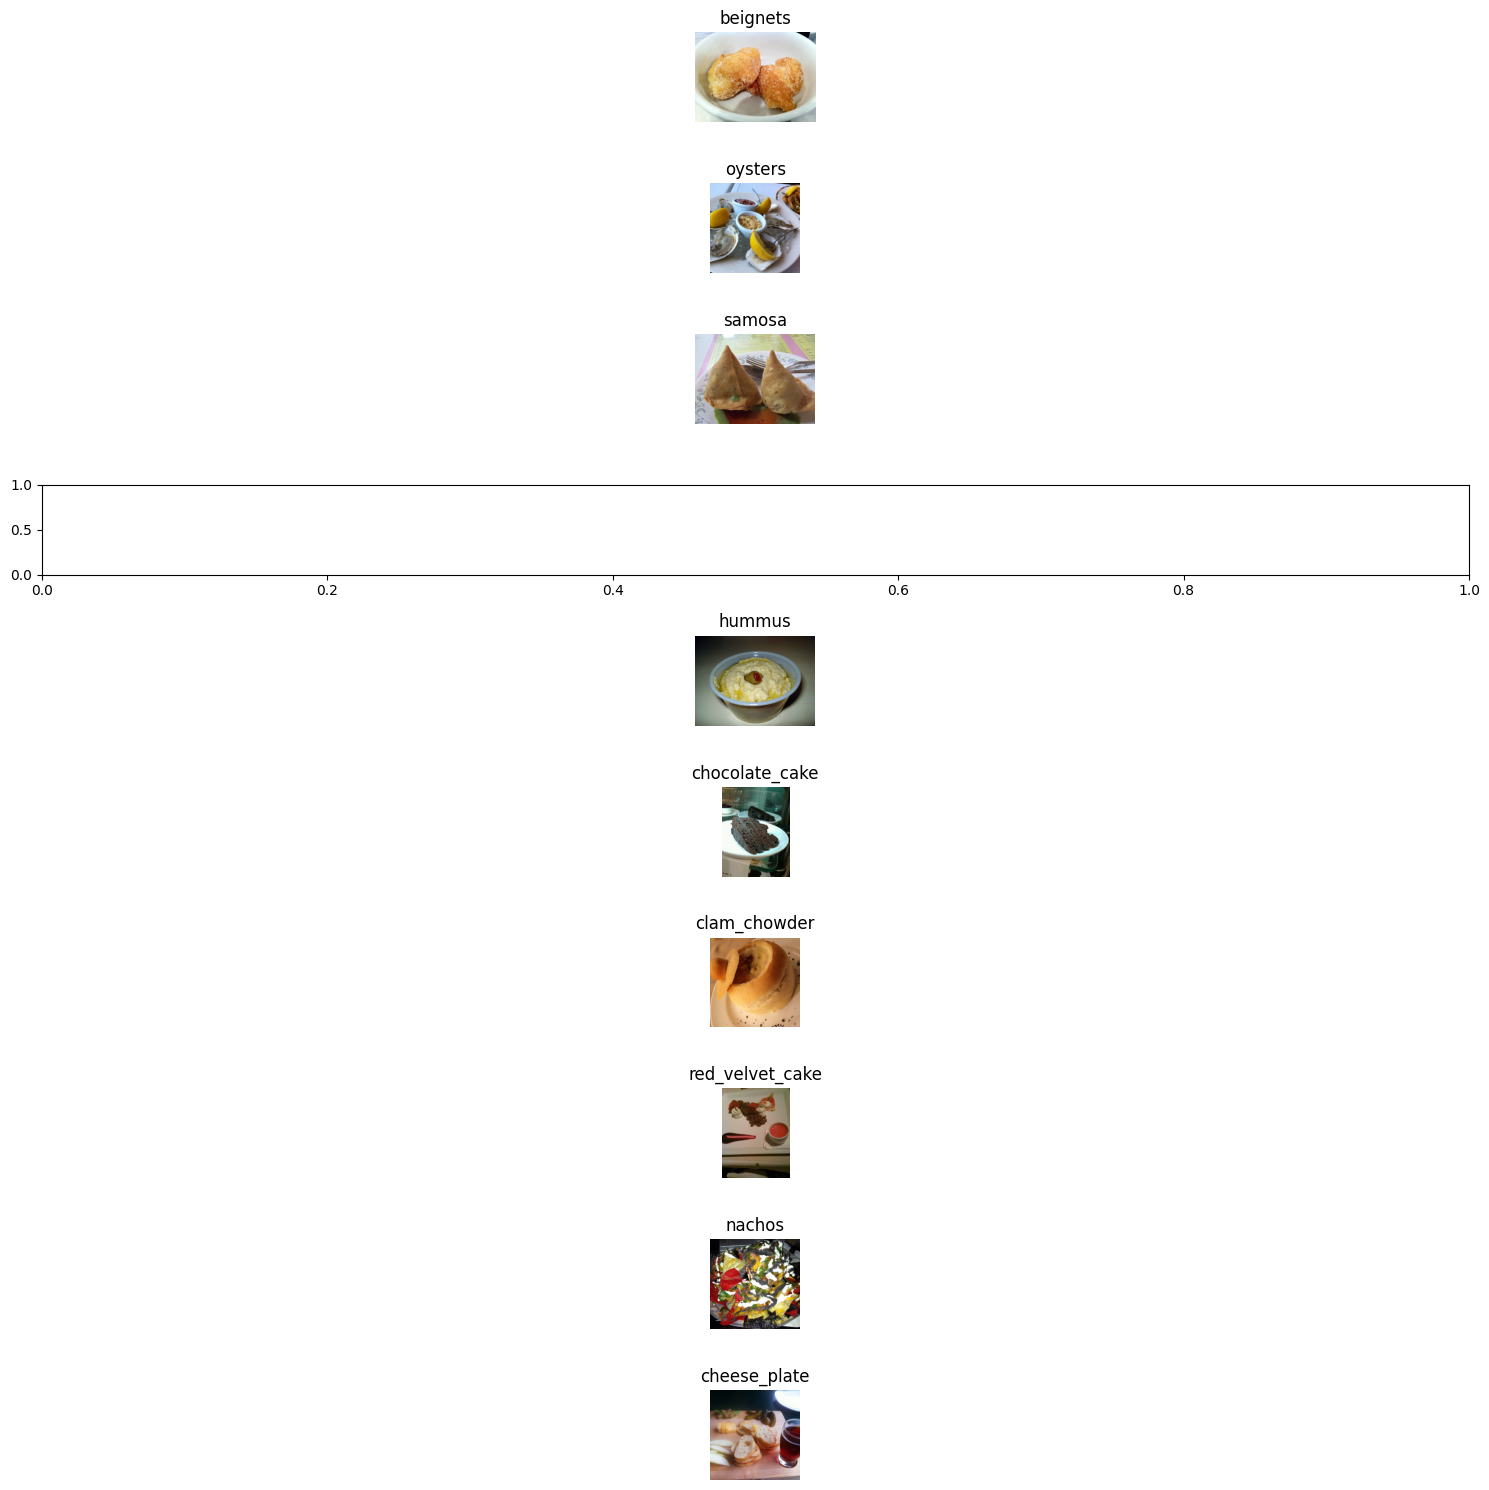

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Define the directory containing the images
images_dir = os.path.join(inner_dir, "images")

# Get a list of subdirectories (each subdirectory corresponds to a food category)
food_categories = os.listdir(images_dir)

# Define the number of rows and columns for the grid
num_rows = 10
num_cols = 1

# Create a new figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Randomly shuffle the food categories
random.shuffle(food_categories)

# Iterate over each category and display one random image in the grid
for i, category in enumerate(food_categories[:num_rows * num_cols]):
    category_dir = os.path.join(images_dir, category)
    if os.path.isdir(category_dir):
        image_files = os.listdir(category_dir)
        if image_files:  # Check if there are any images in the category
            selected_image = random.choice(image_files)
            image_path = os.path.join(category_dir, selected_image)
            # Load the image
            img = mpimg.imread(image_path)
            # Display the image on the corresponding subplot
            axes[i].imshow(img)
            axes[i].set_title(category)
            axes[i].axis('off')

# Remove any remaining empty subplots
for j in range(num_rows * num_cols):
    if j >= len(food_categories):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
# Define lists to store file paths and corresponding labels for the selected photos
selected_file_paths = []
selected_labels = []

# Define the number of photos to select from each class
num_photos_per_class = 20

# Iterate through each food category
for category in food_categories:
    category_dir = os.path.join(images_dir, category)
    if os.path.isdir(category_dir):
        image_files = os.listdir(category_dir)
        # Sort the image files to ensure consistent selection of the first 10 images
        image_files.sort()
        # Select the first 10 photos from each class
        selected_files = image_files[:num_photos_per_class]
        # Add file paths and corresponding labels to the lists
        selected_file_paths.extend([os.path.join(category_dir, image_file) for image_file in selected_files])
        selected_labels.extend([category] * num_photos_per_class)

# Convert lists to numpy arrays
selected_file_paths = np.array(selected_file_paths)
selected_labels = np.array(selected_labels)

# Print the selected file paths and labels for verification
for i in range(5):
    print("File Path:", selected_file_paths[i])
    print("Label:", selected_labels[i])
    print()

# Operate on the selected photos...


File Path: /content/food-101/food-101/food-101/images/bruschetta/1003796.jpg
Label: bruschetta

File Path: /content/food-101/food-101/food-101/images/bruschetta/1013211.jpg
Label: bruschetta

File Path: /content/food-101/food-101/food-101/images/bruschetta/1018048.jpg
Label: bruschetta

File Path: /content/food-101/food-101/food-101/images/bruschetta/1029070.jpg
Label: bruschetta

File Path: /content/food-101/food-101/food-101/images/bruschetta/1030241.jpg
Label: bruschetta



In [ ]:
import cv2

# Define a function to load and preprocess images
def load_and_preprocess_images(file_paths, labels):
    images = []
    # Iterate through each file path and label
    for file_path, label in zip(file_paths, labels):
        # Load the image using OpenCV
        image = cv2.imread(file_path)
        # Resize the image to a consistent size (e.g., 224x224)
        image = cv2.resize(image, (224, 224))
        # Normalize the pixel values to the range [0, 1]
        image = image.astype("float32") / 255.0
        images.append(image)
    # Convert the list of images to a numpy array
    images = np.array(images)
    return images

# Define lists to store file paths and corresponding labels for the selected photos
selected_file_paths = []
selected_labels = []

# Define the number of photos to select from each class
num_photos_per_class = 20

# Iterate through each food category
for category in food_categories:
    category_dir = os.path.join(images_dir, category)
    if os.path.isdir(category_dir):
        image_files = os.listdir(category_dir)
        # Shuffle the image files to select random photos
        random.shuffle(image_files)
        # Select the first 5 photos from each class
        selected_files = image_files[:num_photos_per_class]
        # Add file paths and corresponding labels to the lists
        selected_file_paths.extend([os.path.join(category_dir, image_file) for image_file in selected_files])
        selected_labels.extend([category] * num_photos_per_class)

# Convert lists to numpy arrays
selected_file_paths = np.array(selected_file_paths)
selected_labels = np.array(selected_labels)

# Load and preprocess the selected subset of images
X_selected = load_and_preprocess_images(selected_file_paths, selected_labels)

# Print the shape of the preprocessed subset of dataset
print("Preprocessed subset of dataset shape:", X_selected.shape)
print("Subset of labels shape:", selected_labels.shape)


Preprocessed subset of dataset shape: (2020, 224, 224, 3)
Subset of labels shape: (2020,)


In [ ]:
import cv2
import numpy as np

def load_and_preprocess_images_batch(file_paths, labels, batch_size):
    num_batches = len(file_paths) // batch_size
    if len(file_paths) % batch_size != 0:
        num_batches += 1

    images_batches = []
    labels_batches = []

    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, len(file_paths))
        batch_files = file_paths[start_idx:end_idx]
        batch_labels = labels[start_idx:end_idx]

        images_batch = []
        for file_path in batch_files:
            image = cv2.imread(file_path)
            image = cv2.resize(image, (224, 224))
            image = image.astype("float32") / 255.0
            images_batch.append(image)

        images_batches.append(np.array(images_batch))
        labels_batches.append(batch_labels)

    return images_batches, labels_batches

# Define lists to store file paths and corresponding labels for the selected photos
selected_file_paths = []
selected_labels = []

# Define the number of photos to select from each class
num_photos_per_class = 20

# Iterate through each food category
for category in food_categories:
    category_dir = os.path.join(images_dir, category)
    if os.path.isdir(category_dir):
        image_files = os.listdir(category_dir)
        # Shuffle the image files to select random photos
        random.shuffle(image_files)
        # Select the first 5 photos from each class
        selected_files = image_files[:num_photos_per_class]
        # Add file paths and corresponding labels to the lists
        selected_file_paths.extend([os.path.join(category_dir, image_file) for image_file in selected_files])
        selected_labels.extend([category] * num_photos_per_class)

# Convert lists to numpy arrays
selected_file_paths = np.array(selected_file_paths)
selected_labels = np.array(selected_labels)

batch_size = 32  # Adjust batch size based on available memory
X_selected_batches, y_selected_batches = load_and_preprocess_images_batch(selected_file_paths, selected_labels, batch_size)

# Print the shape of the selected dataset batches
print("Number of batches:", len(X_selected_batches))
for i, batch in enumerate(X_selected_batches):
    print("Batch", i+1, "shape:", batch.shape)


Number of batches: 64
Batch 1 shape: (32, 224, 224, 3)
Batch 2 shape: (32, 224, 224, 3)
Batch 3 shape: (32, 224, 224, 3)
Batch 4 shape: (32, 224, 224, 3)
Batch 5 shape: (32, 224, 224, 3)
Batch 6 shape: (32, 224, 224, 3)
Batch 7 shape: (32, 224, 224, 3)
Batch 8 shape: (32, 224, 224, 3)
Batch 9 shape: (32, 224, 224, 3)
Batch 10 shape: (32, 224, 224, 3)
Batch 11 shape: (32, 224, 224, 3)
Batch 12 shape: (32, 224, 224, 3)
Batch 13 shape: (32, 224, 224, 3)
Batch 14 shape: (32, 224, 224, 3)
Batch 15 shape: (32, 224, 224, 3)
Batch 16 shape: (32, 224, 224, 3)
Batch 17 shape: (32, 224, 224, 3)
Batch 18 shape: (32, 224, 224, 3)
Batch 19 shape: (32, 224, 224, 3)
Batch 20 shape: (32, 224, 224, 3)
Batch 21 shape: (32, 224, 224, 3)
Batch 22 shape: (32, 224, 224, 3)
Batch 23 shape: (32, 224, 224, 3)
Batch 24 shape: (32, 224, 224, 3)
Batch 25 shape: (32, 224, 224, 3)
Batch 26 shape: (32, 224, 224, 3)
Batch 27 shape: (32, 224, 224, 3)
Batch 28 shape: (32, 224, 224, 3)
Batch 29 shape: (32, 224, 224, 3)
B

In [ ]:
import cv2
import numpy as np

# Define a function to load and preprocess images
def load_and_preprocess_images(file_paths, labels):
    images = []
    # Iterate through each file path and label
    for file_path, label in zip(file_paths, labels):
        # Load the image using OpenCV
        image = cv2.imread(file_path)
        # Resize the image to a consistent size (e.g., 224x224)
        image = cv2.resize(image, (224, 224))
        # Normalize the pixel values to the range [0, 1]
        image = image.astype("float32") / 255.0
        images.append(image)
    # Convert the list of images to a numpy array
    images = np.array(images)
    return images

# Select one random image per category
num_images_per_category = 10
selected_files = []
selected_labels = []
for category in food_categories:
    category_dir = os.path.join(images_dir, category)
    if os.path.isdir(category_dir):
        image_files = os.listdir(category_dir)
        if image_files:  # Check if there are any images in the category
            selected_image = random.choice(image_files)
            selected_files.append(os.path.join(category_dir, selected_image))
            selected_labels.append(category)

# Prepare the training dataset with one image per category
X_train = load_and_preprocess_images(selected_files, selected_labels)
y_train = selected_labels

# Print the shape of the training dataset
print("Training dataset shape:", X_train.shape)
print("Training labels shape:", len(y_train))

# Modify the function to load and preprocess images in batches
def load_and_preprocess_images_batch(file_paths, labels, batch_size):
    images = []
    for file_path in file_paths:
        # Load the image using OpenCV
        image = cv2.imread(file_path)
        # Resize the image to a consistent size (e.g., 224x224)
        image = cv2.resize(image, (224, 224))
        # Normalize the pixel values to the range [0, 1]
        image = image.astype("float32") / 255.0
        images.append(image)
    # Convert the list of images to a numpy array
    images = np.array(images)
    # Reshape the array into batches
    images_batches = np.array_split(images, len(images) // batch_size)
    labels_batches = np.array_split(labels, len(labels) // batch_size)
    return images_batches, labels_batches

# Define batch size
batch_size = 32

# Load and preprocess the training images in batches
X_train_batches, y_train_batches = load_and_preprocess_images_batch(selected_files, selected_labels, batch_size)

# Print the number of batches and the shape of the first batch
print("Number of batches:", len(X_train_batches))
print("Shape of the first batch:", X_train_batches[0].shape)


Training dataset shape: (101, 224, 224, 3)
Training labels shape: 101
Number of batches: 3
Shape of the first batch: (34, 224, 224, 3)


In [ ]:
import numpy as np

# Check the type of X_train_batches[0] (the first batch)
print("Type of the first batch of X_train_batches:", type(X_train_batches[0]))

# Convert each batch to a NumPy array if it's not already
X_train_batches_np = [np.array(batch) if not isinstance(batch, np.ndarray) else batch for batch in X_train_batches]

# Verify the shape of each batch
for i, batch in enumerate(X_train_batches_np):
    print("Shape of batch", i+1, ":", batch.shape)

# Concatenate the batches along the first axis to reconstruct the full training dataset
X_train_concatenated = np.concatenate(X_train_batches_np, axis=0)

# Verify the shape of the reconstructed training dataset
print("Shape of reconstructed X_train:", X_train_concatenated.shape)


Type of the first batch of X_train_batches: <class 'numpy.ndarray'>
Shape of batch 1 : (34, 224, 224, 3)
Shape of batch 2 : (34, 224, 224, 3)
Shape of batch 3 : (33, 224, 224, 3)
Shape of reconstructed X_train: (101, 224, 224, 3)


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Define the number of classes
num_classes = len(food_categories)  # Assuming 101 classes for the Food-101 dataset

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Combine base model and custom top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Prepare the training dataset with the selected images
X_train_selected = load_and_preprocess_images(selected_files, selected_labels)

# Convert string labels to numerical labels using LabelEncoder for the selected labels
label_encoder = LabelEncoder()
y_train_selected_encoded = label_encoder.fit_transform(selected_labels)
num_classes_selected = len(label_encoder.classes_)

# Convert numerical labels to one-hot encoding
y_train_selected_one_hot = to_categorical(y_train_selected_encoded, num_classes=num_classes_selected)

# Adjust the number of classes to match the output neurons in the last layer of the model
if num_classes_selected != num_classes:
    print("Number of classes in label encoding and model do not match. Adjusting...")
    num_classes = num_classes_selected
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the selected dataset
history = model.fit(X_train_selected, y_train_selected_one_hot, epochs=5, batch_size=5, validation_split=0.2)


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
# Update the output layer of the model for regression
predictions = Dense(1, activation=None)(x)  # Single neuron for predicting calorie value

# Compile the model with appropriate loss function for regression
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model on the dataset with calorie values
history = model.fit(X_train_selected, y_train_selected_one_hot, epochs=5, batch_size=5, validation_split=0.2)



Epoch 1/5
16/16 [==============================] - 5s 110ms/step - loss: 0.0098 - mae: 0.0196 - mse: 0.0098 - val_loss: 0.0099 - val_mae: 0.0197 - val_mse: 0.0099
Epoch 2/5
16/16 [==============================] - 1s 32ms/step - loss: 0.0098 - mae: 0.0196 - mse: 0.0098 - val_loss: 0.0099 - val_mae: 0.0197 - val_mse: 0.0099
Epoch 3/5
16/16 [==============================] - 0s 28ms/step - loss: 0.0098 - mae: 0.0196 - mse: 0.0098 - val_loss: 0.0100 - val_mae: 0.0197 - val_mse: 0.0100
Epoch 4/5
16/16 [==============================] - 0s 31ms/step - loss: 0.0098 - mae: 0.0196 - mse: 0.0098 - val_loss: 0.0100 - val_mae: 0.0197 - val_mse: 0.0100
Epoch 5/5
16/16 [==============================] - 0s 28ms/step - loss: 0.0098 - mae: 0.0196 - mse: 0.0098 - val_loss: 0.0100 - val_mae: 0.0197 - val_mse: 0.0100


1/1 [==============================] - 0s 37ms/step


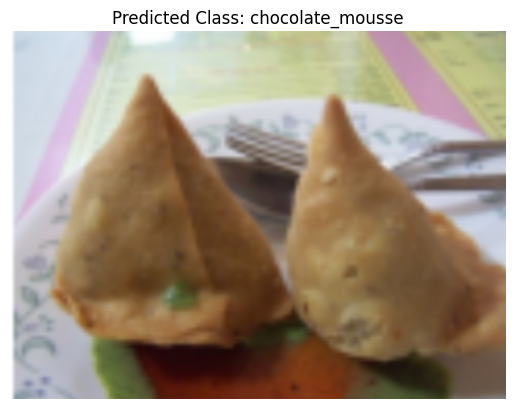

Predicted Class: chocolate_mousse


In [ ]:
import cv2
import matplotlib.pyplot as plt

def predict_class(model, image_path, food_categories, show=True):
    """
    Predict the class label for the given image using the provided model.

    Args:
    - model: Trained model for making predictions
    - image_path: Path to the image file
    - food_categories: List of food category labels
    - show: Boolean flag to control image display

    Returns:
    - predicted_class: Predicted food category label
    """
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make prediction using the model
    pred = model.predict(img)
    predicted_class_index = np.argmax(pred)
    predicted_class = food_categories[predicted_class_index]

    # Display the image with the predicted class label
    if show:
        plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title("Predicted Class: " + predicted_class)
        plt.show()

    return predicted_class

# Example usage:
image_path = "samosa.png"
predicted_class = predict_class(model, image_path, food_categories)
print("Predicted Class:", predicted_class)
